# <center>Machine Learning Report</center>
### <center>Donato Meoli</center>

<center>Machine Learning course 654AA</center>
<center>Academic year: 2019/2020</center>

<center>Type of project: A with Computational Mathematics</center>

### Abstract

I developed a sklearn compatible module with some of the most importat machine learning models (e.g. linear models, deep neural networks and SVMs).

### Monk's Problem

#### Monk #1

In [13]:
from utils import load_monk
from ml.svm import SVC
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = load_monk(1)

svc = SVC(kernel='poly')
svc.fit(X_train, y_train)
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       216
         1.0       1.00      1.00      1.00       216

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432



#### Monk #2

In [29]:
from utils import load_monk
from ml.svm import SVC
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = load_monk(2)

svc = SVC(kernel='poly', degree=3)
svc.fit(X_train, y_train)
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.83      0.73      0.78       290
         1.0       0.56      0.70      0.62       142

    accuracy                           0.72       432
   macro avg       0.70      0.72      0.70       432
weighted avg       0.74      0.72      0.73       432



#### Monk #3

In [37]:
from sklearn.metrics import classification_report
from utils import load_monk
from ml.svm import SVC

X_train, X_test, y_train, y_test = load_monk(3)

svc = SVC(kernel='rbf', gamma='scale')
svc.fit(X_train, y_train)
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98       204
         1.0       1.00      0.96      0.98       228

    accuracy                           0.98       432
   macro avg       0.98      0.98      0.98       432
weighted avg       0.98      0.98      0.98       432



In [38]:
from ml.activations import sigmoid, softmax
from ml.layers import FullyConnected
from ml.losses import cross_entropy
from ml.neural_network import NeuralNetworkClassifier
from optimization.unconstrained.quasi_newton import BFGS
from utils import load_monk

X_train, X_test, y_train, y_test = load_monk(1)
net = NeuralNetworkClassifier((FullyConnected(17, 4, sigmoid),
                               FullyConnected(4, 2, softmax)),
                              loss=cross_entropy, optimizer=BFGS, 
                              epochs=100, verbose=False, plot=True)
net.fit(X_train, y_train, X_test, y_test)
print(f'monk #1 classification report:\n {classification_report(y_test, svc.predict(X_test))}')

TypeError: __init__() got an unexpected keyword argument 'plot'

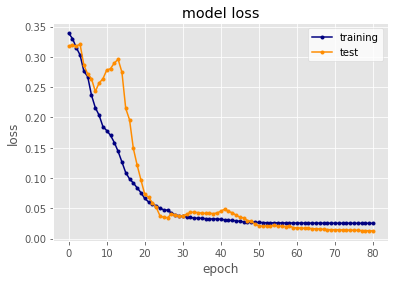

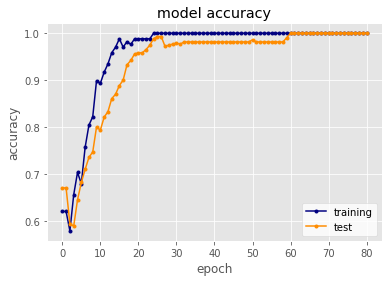

monk #2 classification report:
               precision    recall  f1-score   support

         0.0       0.65      0.48      0.55       290
         1.0       0.31      0.47      0.37       142

    accuracy                           0.48       432
   macro avg       0.48      0.48      0.46       432
weighted avg       0.54      0.48      0.49       432



In [25]:
X_train, X_test, y_train, y_test = load_monk(2)
net = NeuralNetworkClassifier((FullyConnected(17, 4, sigmoid),
                               FullyConnected(4, 2, softmax)),
                              loss=cross_entropy, optimizer=BFGS, 
                              epochs=100, verbose=False, plot=True)
net.fit(X_train, y_train, X_test, y_test)
print(f'monk #2 classification report:\n {classification_report(y_test, svc.predict(X_test))}')

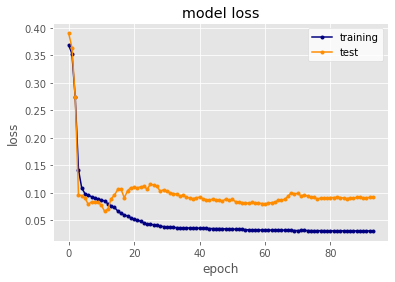

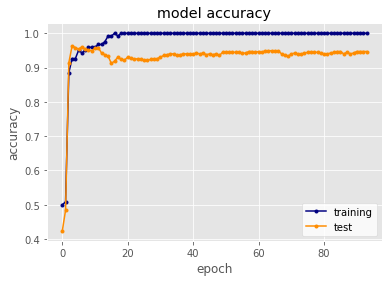

monk #3 classification report:
               precision    recall  f1-score   support

         0.0       0.95      1.00      0.98       204
         1.0       1.00      0.96      0.98       228

    accuracy                           0.98       432
   macro avg       0.98      0.98      0.98       432
weighted avg       0.98      0.98      0.98       432



In [26]:
X_train, X_test, y_train, y_test = load_monk(3)
net = NeuralNetworkClassifier((FullyConnected(17, 4, sigmoid),
                               FullyConnected(4, 2, softmax)),
                              loss=cross_entropy, optimizer=BFGS, 
                              epochs=100, verbose=False, plot=True)
net.fit(X_train, y_train, X_test, y_test)
print(f'monk #3 classification report:\n {classification_report(y_test, svc.predict(X_test))}')